<a href="https://colab.research.google.com/github/ayesha-119/Deep-Learning-BWF/blob/master/Task_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🔴 Task 30**

**Topics: Recurrent Neural Network, LSTM, GRU**

Resource: https://drive.google.com/file/d/1i9dPxM_1M4HYN5bYxFcuklC1vM0GrOCq/view?usp=share_link

**Word-level one-hot encoding (toy example)**

In [1]:
import numpy as np
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
token_index = {}
for sample in samples:
  for word in sample.split():
    if word not in token_index:
      token_index[word] = len(token_index) + 1

max_length = 10
results = np.zeros(shape=(len(samples),
                          max_length,
                          max(token_index.values()) + 1))

for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = token_index.get(word)
    results[i, j, index] = 1.

**Character-level one-hot encoding (toy example)**

In [2]:
import string
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable
token_index = dict(zip(range(1, len(characters) + 1), characters))
max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))
for i, sample in enumerate(samples):
  for j, character in enumerate(sample):
    index = token_index.get(character)
    results[i, j, index] = 1.

**Using Keras for word-level one-hot encoding**

In [3]:
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


**Word-level one-hot encoding with hashing trick (toy example)**

In [4]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
dimensionality = 1000
max_length = 10
results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = abs(hash(word)) % dimensionality
    results[i, j, index] = 1.

Instantiating an Embedding layer

In [5]:
from keras.layers import Embedding
embedding_layer = Embedding(1000, 64)

**Loading the IMDB data for use with an Embedding layer**

In [11]:
from keras.datasets import imdb
from keras.utils import pad_sequences
max_features = 10000
maxlen = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(
    num_words=max_features)
x_train =pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

**Using an Embedding layer and classifier on the IMDB data**

In [12]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train,
epochs=10,
batch_size=32,
validation_split=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.6565 - acc: 0.6426 - val_loss: 0.5924 - val_acc: 0.7054
Epoch 2/10
625/625 [==============================] - 1s 1ms/step - loss: 0.5229 - acc: 0.7544 - val_loss: 0.5155 - val_acc: 0.7388
Epoch 3/10
625/625 [==============================] 

# **Recurrent neural networks**

**Numpy implementation of a simple RNN**

In [13]:
import numpy as np
timesteps = 100
input_features = 32
output_features = 64
inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))
successive_outputs = []
for input_t in inputs:
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
  successive_outputs.append(output_t)
  state_t = output_t
final_output_sequence = np.concatenate(successive_outputs, axis=0)

**Preparing the IMDB data**

In [16]:
from keras.datasets import imdb
from keras.preprocessing import sequence
max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


**Training the model with Embedding and SimpleRNN layers**

In [18]:
from keras.layers import Dense
from keras.layers import SimpleRNN
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,

epochs=10,
batch_size=128,
validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 18s 112ms/step - loss: 0.6782 - acc: 0.5675 - val_loss: 0.6617 - val_acc: 0.5774
Epoch 2/10
157/157 [==============================] - 20s 130ms/step - loss: 0.5021 - acc: 0.7691 - val_loss: 0.4335 - val_acc: 0.8148
Epoch 3/10
157/157 [==============================] - 18s 114ms/step - loss: 0.3406 - acc: 0.8582 - val_loss: 0.5379 - val_acc: 0.7682
Epoch 4/10
157/157 [==============================] - 16s 102ms/step - loss: 0.2580 - acc: 0.8992 - val_loss: 0.3670 - val_acc: 0.8584
Epoch 5/10
157/157 [==============================] - 17s 108ms/step - loss: 0.1805 - acc: 0.9327 - val_loss: 0.4354 - val_acc: 0.8192
Epoch 6/10
157/157 [==============================] - 16s 104ms/step - loss: 0.1169 - acc: 0.9603 - val_loss: 0.4424 - val_acc: 0.8422
Epoch 7/10
157/157 [==============================] - 17s 109ms/step - loss: 0.0814 - acc: 0.9737 - val_loss: 0.5747 - val_acc: 0.7900
Epoch 8/10
157/157 [==============================] - 1

**Plotting results**

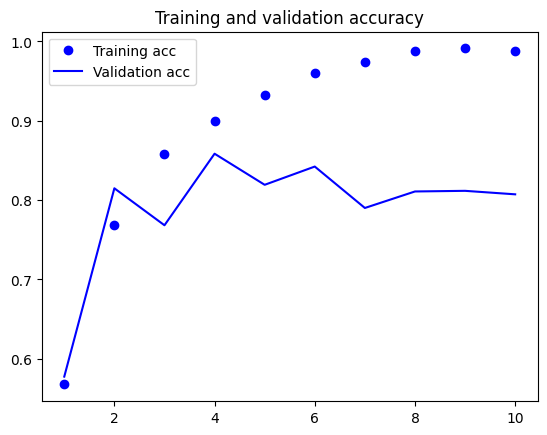

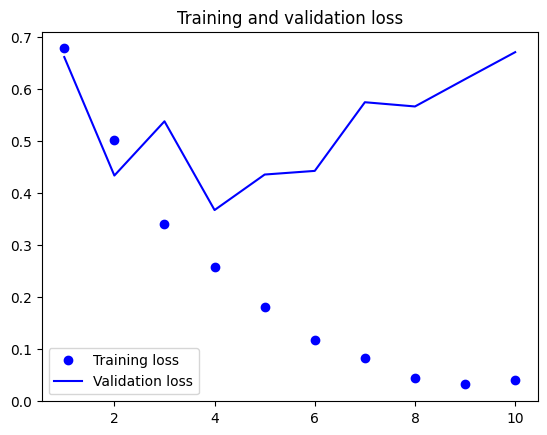

In [19]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# **Understanding the LSTM and GRU layers**

Using the LSTM layer in Keras

In [21]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

history = model.fit(input_train, y_train,

epochs=10,
batch_size=128,
validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 36s 222ms/step - loss: 0.5998 - acc: 0.6712 - val_loss: 0.4440 - val_acc: 0.8104
Epoch 2/10
157/157 [==============================] - 35s 225ms/step - loss: 0.3614 - acc: 0.8525 - val_loss: 0.3120 - val_acc: 0.8734
Epoch 3/10
157/157 [==============================] - 34s 219ms/step - loss: 0.2748 - acc: 0.8943 - val_loss: 0.3084 - val_acc: 0.8736
Epoch 4/10
157/157 [==============================] - 35s 220ms/step - loss: 0.2325 - acc: 0.9110 - val_loss: 0.4267 - val_acc: 0.8262
Epoch 5/10
157/157 [==============================] - 35s 223ms/step - loss: 0.1998 - acc: 0.9276 - val_loss: 0.3778 - val_acc: 0.8478
Epoch 6/10
157/157 [==============================] - 34s 220ms/step - loss: 0.1858 - acc: 0.9319 - val_loss: 0.3716 - val_acc: 0.8710
Epoch 7/10
157/157 [==============================] - 34s 217ms/step - loss: 0.1615 - acc: 0.9428 - val_loss: 0.3192 - val_acc: 0.8668
Epoch 8/10
157/157 [==============================] - 3